## Seaborn Example 1

In [1]:
import matplotlib.pyplot as plt  # matplotlib is needed for the figure settings
import seaborn as sns  # seabon library https://seaborn.pydata.org/
import pprint  # Helps printing lists and dictionaries in a more readable format

# Vega based python visualization library https://altair-viz.github.io/
import altair as alt
from vega_datasets import data  # Vega's datasetsZ

import pandas as pd  # Pandas library for loading and processing tabular data
from tqdm.notebook import tqdm as tq  # progress bar for lengthy loops

In [2]:
import warnings

# Filter out the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
### https://seaborn.pydata.org/introduction.html
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


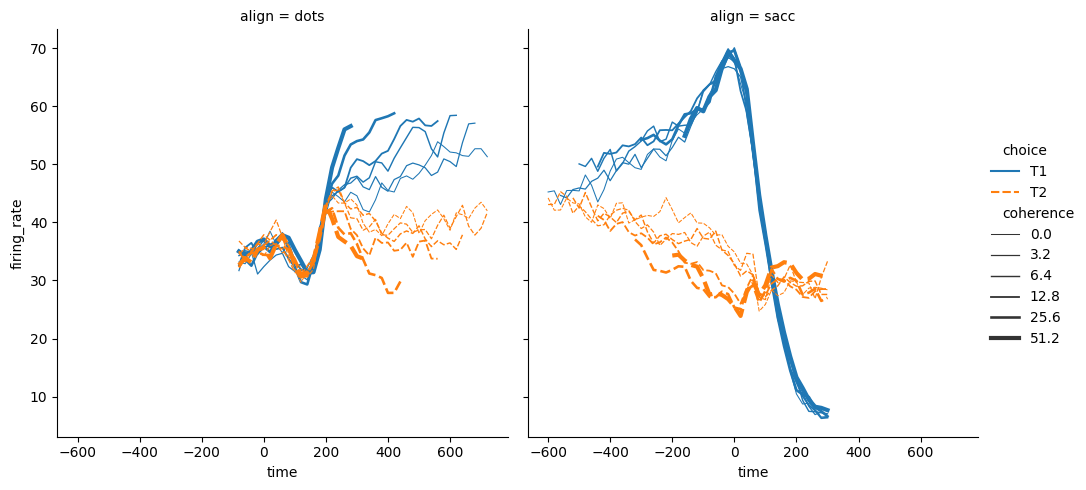

In [4]:
sns.relplot(x="time",                     ## x axis attr
            y="firing_rate",              ## y axis attr
            col="align",                  ## 1 variable for each column (each plots)
            hue="choice",                 ## color coding based on category
            size="coherence",             ## Size based on coherence column (attr)
            style="choice",               ## Style based on choice attr
            kind="line",                  ## relational line chart
            legend="full",                ## add all elements to legend
            data=dots);                   ## pandas dataframe: dots

# Data from US Census

## Get data from the following source:
https://github.com/umassdgithub/Age_State



In [5]:
source_links = ["https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2010.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2011.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2012.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2013.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2014.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2015.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2016.csv"]

In [6]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [7]:
start_year = 2010
dfs = []
for i, link in tq(enumerate(source_links)):
    # the first row is extra, so skip it
    df_temp = pd.read_csv(link, skiprows=1)
    df_temp["date"] = start_year + i  # files are sorted by year of estimate
    dfs.append(df_temp)

# returns 1 dataframe for all the dataframes in the list
df_ages_all = pd.concat(dfs)

df_ages = df_ages_all.copy()  # Keep an original copy of the data
df_ages.head(4)

0it [00:00, ?it/s]

,id,Geographic Area Name,Female!!Estimate!!AGE!!15 to 19 years,Female!!Margin of Error!!AGE!!15 to 19 years,Female!!Estimate!!AGE!!20 to 24 years,Female!!Margin of Error!!AGE!!20 to 24 years,Female!!Estimate!!AGE!!25 to 29 years,Female!!Margin of Error!!AGE!!25 to 29 years,Female!!Estimate!!AGE!!30 to 34 years,Female!!Margin of Error!!AGE!!30 to 34 years,...,Total!!Estimate!!PERCENT ALLOCATED!!Age,Total!!Margin of Error!!PERCENT ALLOCATED!!Age,Male!!Estimate!!PERCENT ALLOCATED!!Sex,Male!!Margin of Error!!PERCENT ALLOCATED!!Sex,Male!!Estimate!!PERCENT ALLOCATED!!Age,Male!!Margin of Error!!PERCENT ALLOCATED!!Age,Female!!Estimate!!PERCENT ALLOCATED!!Sex,Female!!Margin of Error!!PERCENT ALLOCATED!!Sex,Female!!Estimate!!PERCENT ALLOCATED!!Age,Female!!Margin of Error!!PERCENT ALLOCATED!!Age
0,0400000US01,Alabama,6.8,0.1,7.0,0.2,6.4,0.1,6.1,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0400000US02,Alaska,7.3,0.4,7.7,0.4,7.3,0.2,6.8,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0400000US04,Arizona,6.9,0.1,6.6,0.1,6.7,0.1,6.4,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0400000US05,Arkansas,7.0,0.2,6.8,0.3,6.2,0.2,6.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#for col in df_ages.columns:
#  print(col)

## drop all the extra cols and just keep the needed ones

In [9]:
needed_cols = ["Geographic Area Name","date","Total!!Estimate!!Total population"] ## when working with the total population of each state only
for col in df_ages.columns:
  if "Total!!Estimate!!AGE" in col:
    needed_cols.append(col)
df_ages = df_ages[needed_cols]
new_col_names =["state","date","total"] + [col.split("!!")[3] for col in df_ages.columns[3:]]
df_ages.columns = new_col_names

In [10]:
df_ages

,state,date,total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
0,Alabama,2010,4785298,6.4,6.5,6.7,7.3,7.1,6.4,6.2,...,6.6,7.2,7.2,6.5,5.8,4.3,3.4,2.6,1.8,1.6
1,Alaska,2010,713985,7.5,7.0,7.3,7.2,7.8,7.7,6.8,...,7.3,7.9,7.8,7.1,5.2,2.9,1.9,1.2,0.9,0.6
2,Arizona,2010,6413737,7.1,7.0,7.1,7.2,6.9,6.9,6.5,...,6.3,6.6,6.5,5.9,5.6,4.4,3.4,2.5,1.9,1.6
3,Arkansas,2010,2921606,6.7,6.7,6.9,7.2,6.8,6.4,6.2,...,6.3,6.9,7.0,6.2,5.9,4.6,3.5,2.6,2.0,1.8
4,California,2010,37349363,6.8,6.8,6.9,7.6,7.5,7.3,6.9,...,7.0,7.2,6.9,5.9,5.0,3.5,2.6,2.1,1.6,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Washington,2016,7288000,6.2,6.4,6.1,6.2,6.6,7.5,7.2,...,6.1,6.5,6.6,6.7,6.3,5.3,3.7,2.4,1.6,1.8
48,West Virginia,2016,1831102,5.6,5.6,5.8,6.2,6.3,6.0,5.8,...,6.3,6.4,6.9,7.4,7.1,6.5,4.6,3.3,2.0,2.3
49,Wisconsin,2016,5778709,5.8,6.2,6.3,6.6,7.0,6.2,6.4,...,5.7,6.3,7.2,7.4,6.6,5.4,3.8,2.7,2.0,2.2
50,Wyoming,2016,585501,6.5,7.5,6.4,6.4,6.5,6.9,6.9,...,6.1,5.7,6.1,6.7,7.1,5.2,3.9,2.5,1.6,1.7


# Seaborn Example 2
- by visualizing the population each year, we don't see any changes in the years. Is that correct?
- To answer this question, we calculate the diff for each year, each state


In [ ]:
f,ax = plt.subplots(1,1,figsize = (12,30))


x
df_heatmap = df_ages[df_ages.columns[0:3]].pivot(df_ages.columns[0], df_ages.columns[1], df_ages.columns[2])
sns.heatmap(data = df_heatmap, ax=ax).set_title('Total Population Per Year')

# Seaborn Example 2: of Heatmap with population per year

Text(0.5, 1.0, 'Total Population Per Year')

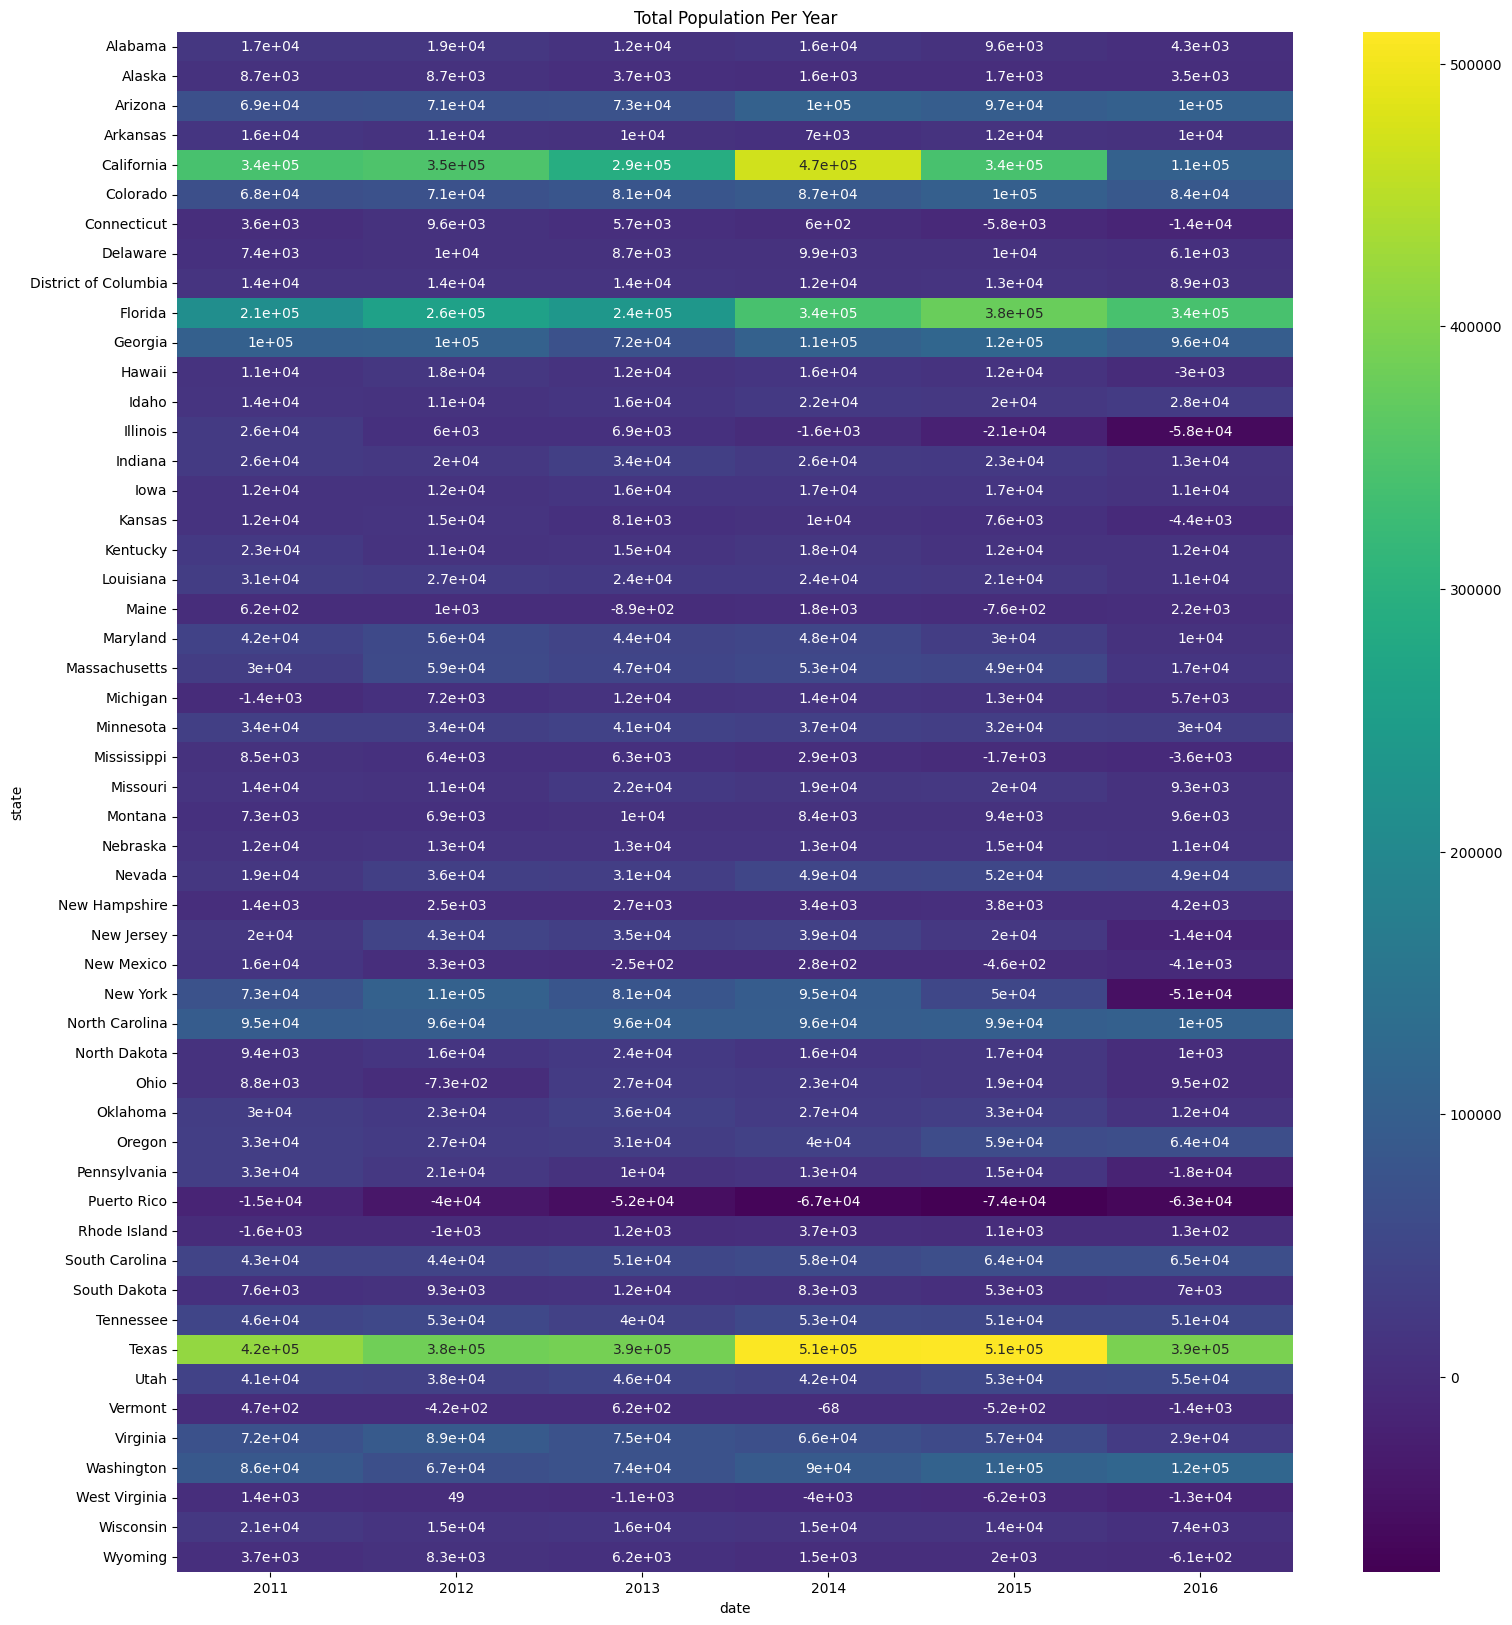

In [ ]:
f,ax = plt.subplots(1,1,figsize=(18,20))
df_population_by_year = df_ages[['state','date','total']].copy()
## transform data to columns of states and rows of dates
df_population_by_year_pivot = df_population_by_year.pivot(index='date',columns='state',values='total')
## calculate the number of changes in each year compared to the previous year ---> remove first row as it is 0
df_population_by_year_pivot = df_population_by_year_pivot.diff().dropna()

sns.heatmap(data = df_population_by_year_pivot.T,cmap="viridis",annot=True).set_title('Total Population Per Year')

In [ ]:
# Top States based on the variance, Min and Max Population increase
state_with_min_increase = df_population_by_year_pivot.sum().sort_values().reset_index().state.values[0]
state_with_max_increase = df_population_by_year_pivot.sum().sort_values().reset_index().state.values[-1]
state_with_max_variance = df_population_by_year_pivot.var().sort_values().reset_index().state.values[-1]
## filter and keep data for the three states
df_population_by_year_3states = df_population_by_year[df_population_by_year.state.isin([state_with_min_increase,state_with_max_increase,state_with_max_variance])].copy()

#df_population_by_year_3states = df_population_by_year_3states.pivot(index="date",columns="state",values="total")

# pivot the data into years


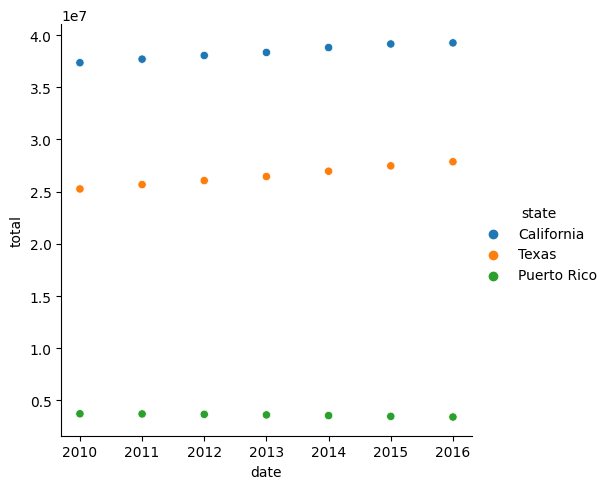

In [ ]:
sns.relplot(data=df_population_by_year_3states,x='date',y='total',hue='state')

# Example Altair 1


## Barley dataset from vega

In [ ]:
source = data.barley()
source.head(10)

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids
5,28.96667,Manchuria,1931,Duluth
6,43.06666,Glabron,1931,University Farm
7,55.20000,Glabron,1931,Waseca
8,28.76667,Glabron,1931,Morris
9,38.13333,Glabron,1931,Crookston


In [ ]:
alt.Chart(source).mark_bar().encode(
    x='variety',
    y='sum(yield)',
    color='site'
)

alt.Chart(...)

# Example Altair 2

In [ ]:
## sort the dataframe by poputlation total
df_population_by_year_melt = df_population_by_year_pivot.melt(ignore_index=False)
df_population_by_year_melt.head()
df_population_by_year_melt.sort_values(by='value', ascending=False,inplace=True)
df_population_by_year_melt.reset_index(inplace=True)
df_population_by_year_melt.head()

,date,state,value
0,2015,Texas,512156.0
1,2014,Texas,508765.0
2,2014,California,469979.0
3,2011,Texas,417567.0
4,2016,Texas,393482.0


In [ ]:
alt.Chart(df_population_by_year_melt).mark_bar().encode(
    x='state',
    y='value',
    color=alt.Color('date:N',
        scale=alt.Scale(scheme='category10')
    )
    ).properties(
    title=['Population Change Each Year'],
    height=400
)

alt.Chart(...)

In [ ]:
df_2016_population_change = df_population_by_year_melt[df_population_by_year_melt['date']==2016].copy()
df_2016_population_change.head()

,date,state,value
4,2016,Texas,393482.0
11,2016,Florida,341167.0
17,2016,Washington,117649.0
20,2016,California,105199.0
25,2016,North Carolina,103986.0


In [ ]:
## Vega datasets
## "https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/"
data.us_10m.url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/us-10m.json'

In [ ]:
import altair as alt
from vega_datasets import data
states = alt.topo_feature("https://raw.githubusercontent.com/umassdgithub/Sample_Data/main/cb_2018_us_state_20m_topo.json", 'cb_2018_us_state_20m')

chart = alt.Chart(states
    ).mark_geoshape(
    stroke='black',
    ).encode(
        color='value:Q',
        tooltip=[
             'properties.NAME:N',
             'value:Q'
            ]
    ).transform_lookup(
        lookup='properties.NAME',                         ## properties.NAME is the indicator inside the "geometries" elements in geojson file
        from_=alt.LookupData(                             ## alt.LookupData is used to lookup value from the data source based on the id of each geometry object
                              df_2016_population_change,  ## first param: is the datasource for the visualization
                             'state',                     ## second param: is the name of the column in the data source to be matched with the geometries
                             ['value'])                   ## third param: name of the column to be visualized
    ).properties(
    width=800,
    height=500
    ).project('albersUsa') ## if only US is being projected!

chart

alt.Chart(...)

# Streamgraph

In [ ]:
source = df_population_by_year_melt[df_population_by_year_melt['state'].isin(['Texas','Florida','California','Arkansas',
                                                                              'Michigan','Arizona','West Virginia','New York',
                                                                              'North Carilina','Ohio','Georgia','Pennsylvania',
                                                                              'Mississippi','Maryland','Maine','Indiana'])]
alt.Chart(source).mark_area().encode(
    alt.X('date:N',
        #axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('value:Q', stack='center'),
    alt.Color('state:N',
        scale=alt.Scale(scheme='category20b')
    )
).properties(
    width=800,
    height=500
    ).interactive()

alt.Chart(...)

# Stack data

In [ ]:
## customuize the dataframe for each age group + state name for one particular year
year = 2013
columns = ['state'] + list(df_ages.columns[3:])                   ### make a list, containint "state" and the age groups
df_age_groups =  df_ages[df_ages['date']==year][columns]          ### Filter out other years and only keep 2017
df_age_groups.set_index('state',drop=True,inplace=True)           ### set state as index, for the stacking puposes
df_age_groups = pd.DataFrame(df_age_groups.stack()).reset_index() ### in many visualization tools we need the values to be stacked
df_age_groups.columns = ['state','age group','value']             ### for better look, rename the columns
df_age_groups.head()




,state,age group,value
0,Alabama,Under 5 years,6.0
1,Alabama,5 to 9 years,6.3
2,Alabama,10 to 14 years,6.8
3,Alabama,15 to 19 years,6.8
4,Alabama,20 to 24 years,7.3


In [ ]:
df_age_groups

,state,age group,value
0,Alabama,Under 5 years,6.0
1,Alabama,5 to 9 years,6.3
2,Alabama,10 to 14 years,6.8
3,Alabama,15 to 19 years,6.8
4,Alabama,20 to 24 years,7.3
...,...,...,...
931,Puerto Rico,65 to 69 years,5.4
932,Puerto Rico,70 to 74 years,4.2
933,Puerto Rico,75 to 79 years,3.0
934,Puerto Rico,80 to 84 years,2.0


# <font color = red> Challenge 1: Seaborn</font>
## Plot heat map of age groups percentage and states, for Year 2012

In [ ]:
def plotAgeGroup(year):
  f,ax = plt.subplots(1,1,figsize = (12,30))
  df_ages_year = df_ages[df_ages['date']==year]

  df_ages_year = df_ages_year.drop(columns=['date', 'total'])

  df_ages_year.set_index('state', inplace=True)

  sns.heatmap(data = df_ages_year, ax=ax, annot=True).set_title("Age Groups' percentage in 2012 ")


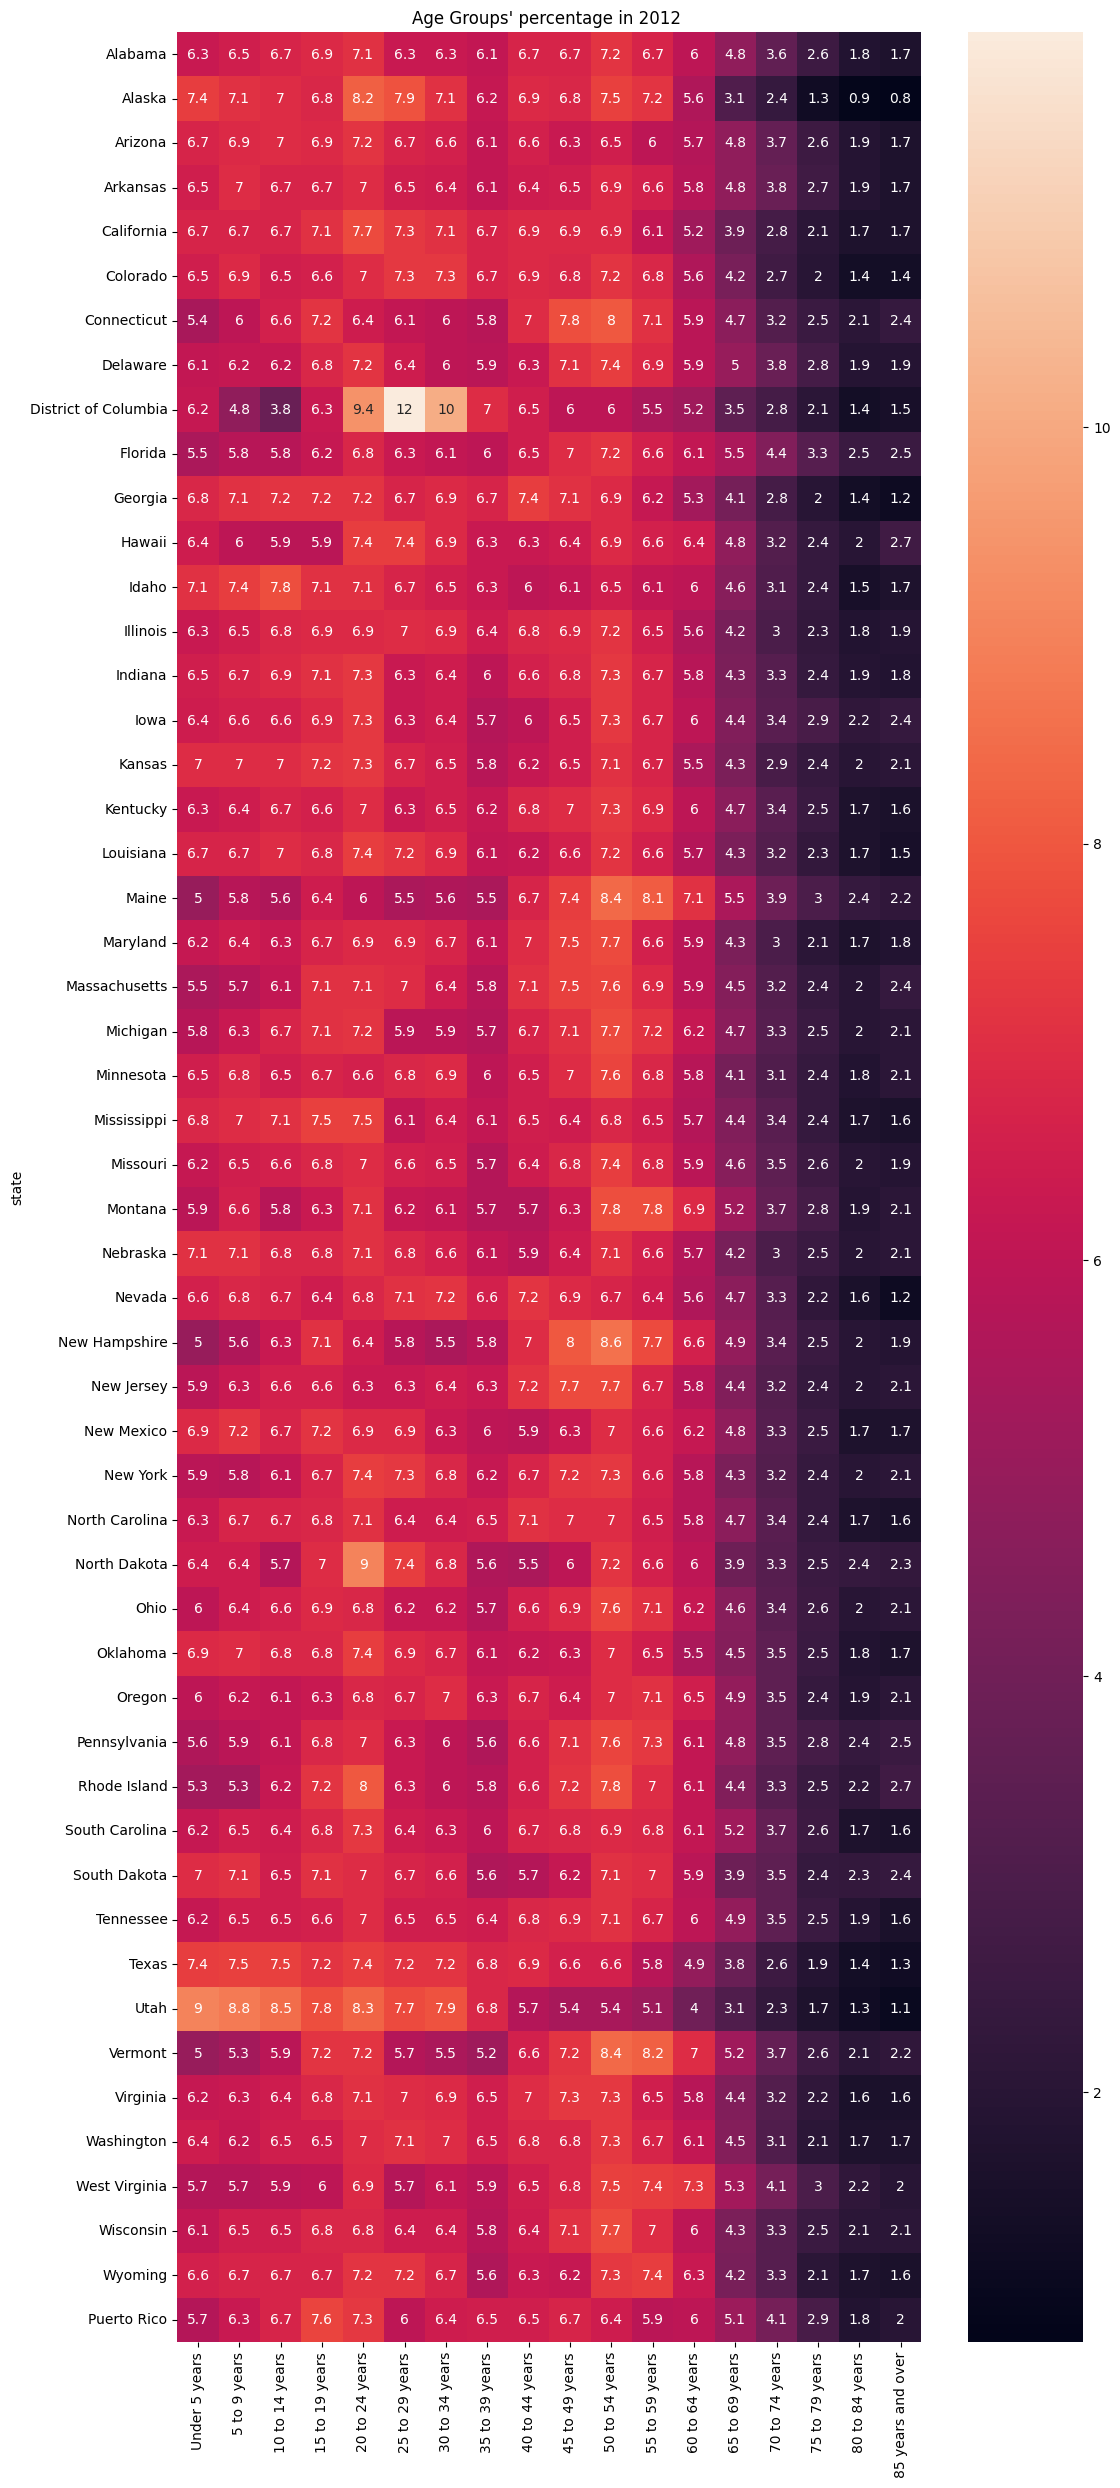

In [ ]:
plotAgeGroup(2012)

# <font color=red> Challenge 2: Altair</font>
## Function to plot percentage of population groups for each year

In [ ]:
df_ages.columns

Index(['state', 'date', 'total', 'Under 5 years', '5 to 9 years',
       '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years',
       '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
       '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years',
       '70 to 74 years', '75 to 79 years', '80 to 84 years',
       '85 years and over'],
      dtype='object')

In [ ]:
def alt_population(year=2012):
    df_year = df_ages[df_ages['date']==year]

    df_year = df_year.drop(columns=['date', 'total'])

    df_melted = df_year.melt(id_vars=['state'], var_name='Age Group', value_name='value')

    chart = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('state:O', title='State'),
        y=alt.Y('value:Q', title='value'),
        color='Age Group:N'
    ).properties(
        width=800,
        height=500,
        title=f'Population Percentage by Age Group in {year}'
    )

    return chart


In [ ]:
alt_population(year=2012)

alt.Chart(...)

# <font color=red> Challenge 3: Seaborn Matplotlib </font>
## The following population pyramid is incomplete is and for all the states, make a function that can generate the same pyramid for 1 state only

In [ ]:
df_ages_all = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2017.csv",skiprows=1)

Male_population_percent = ["Geographic Area Name",
      "Percent Male!!Estimate!!AGE!!Under 5 years",
      "Percent Male!!Estimate!!AGE!!5 to 9 years",
      "Percent Male!!Estimate!!AGE!!10 to 14 years",
      "Percent Male!!Estimate!!AGE!!15 to 19 years",
      "Percent Male!!Estimate!!AGE!!20 to 24 years",
      "Percent Male!!Estimate!!AGE!!25 to 29 years",
      "Percent Male!!Estimate!!AGE!!30 to 34 years",
      "Percent Male!!Estimate!!AGE!!35 to 39 years",
      "Percent Male!!Estimate!!AGE!!40 to 44 years",
      "Percent Male!!Estimate!!AGE!!45 to 49 years",
      "Percent Male!!Estimate!!AGE!!50 to 54 years",
      "Percent Male!!Estimate!!AGE!!55 to 59 years",
      "Percent Male!!Estimate!!AGE!!60 to 64 years",
      "Percent Male!!Estimate!!AGE!!65 to 69 years",
      "Percent Male!!Estimate!!AGE!!70 to 74 years",
      "Percent Male!!Estimate!!AGE!!75 to 79 years",
      "Percent Male!!Estimate!!AGE!!80 to 84 years",
      "Percent Male!!Estimate!!AGE!!85 years and over"]


female_population_percent =["Geographic Area Name",
    "Percent Female!!Estimate!!Total population",
    "Percent Female!!Estimate!!AGE!!Under 5 years",
    "Percent Female!!Estimate!!AGE!!5 to 9 years",
    "Percent Female!!Estimate!!AGE!!10 to 14 years",
    "Percent Female!!Estimate!!AGE!!15 to 19 years",
    "Percent Female!!Estimate!!AGE!!20 to 24 years",
    "Percent Female!!Estimate!!AGE!!25 to 29 years",
    "Percent Female!!Estimate!!AGE!!30 to 34 years",
    "Percent Female!!Estimate!!AGE!!35 to 39 years",
    "Percent Female!!Estimate!!AGE!!40 to 44 years",
    "Percent Female!!Estimate!!AGE!!45 to 49 years",
    "Percent Female!!Estimate!!AGE!!50 to 54 years",
    "Percent Female!!Estimate!!AGE!!55 to 59 years",
    "Percent Female!!Estimate!!AGE!!60 to 64 years",
    "Percent Female!!Estimate!!AGE!!65 to 69 years",
    "Percent Female!!Estimate!!AGE!!70 to 74 years",
    "Percent Female!!Estimate!!AGE!!75 to 79 years",
    "Percent Female!!Estimate!!AGE!!80 to 84 years",
    "Percent Female!!Estimate!!AGE!!85 years and over"]

In [ ]:
df_male = df_ages_all[Male_population_percent]
df_female = df_ages_all[Male_population_percent]

In [ ]:
df_ages_all.head()

,id,Geographic Area Name,Total!!Estimate!!Total population,Total!!Margin of Error!!Total population,Total!!Estimate!!AGE!!Under 5 years,Total!!Margin of Error!!AGE!!Under 5 years,Total!!Estimate!!AGE!!5 to 9 years,Total!!Margin of Error!!AGE!!5 to 9 years,Total!!Estimate!!AGE!!10 to 14 years,Total!!Margin of Error!!AGE!!10 to 14 years,...,Percent Female!!Estimate!!SUMMARY INDICATORS!!Age dependency ratio,Percent Female!!Margin of Error!!SUMMARY INDICATORS!!Age dependency ratio,Percent Female!!Estimate!!SUMMARY INDICATORS!!Old-age dependency ratio,Percent Female!!Margin of Error!!SUMMARY INDICATORS!!Old-age dependency ratio,Percent Female!!Estimate!!SUMMARY INDICATORS!!Child dependency ratio,Percent Female!!Margin of Error!!SUMMARY INDICATORS!!Child dependency ratio,Percent Female!!Estimate!!PERCENT ALLOCATED!!Sex,Percent Female!!Margin of Error!!PERCENT ALLOCATED!!Sex,Percent Female!!Estimate!!PERCENT ALLOCATED!!Age,Percent Female!!Margin of Error!!PERCENT ALLOCATED!!Age
0,0400000US01,Alabama,4874747,*****,288897,2856,299117,8379,314609,7313,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,0400000US02,Alaska,739795,*****,52919,844,54491,2772,48746,2328,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,0400000US04,Arizona,7016270,*****,435041,1331,439162,9140,478839,9200,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,0400000US05,Arkansas,3004279,*****,186640,2636,199930,6556,199660,6144,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,0400000US06,California,39536653,*****,2460425,3179,2468508,19146,2597863,19413,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [ ]:
df_male.head()

,state,Age,Percentage
0,Alabama,Under 5 years,-6.2
1,Alaska,Under 5 years,-6.8
2,Arizona,Under 5 years,-6.4
3,Arkansas,Under 5 years,-6.6
4,California,Under 5 years,-6.4


In [ ]:
df_female[df_female['state']=='Alaska']

,state,Age,Percentage
1,Alaska,Under 5 years,6.8
53,Alaska,5 to 9 years,7.1
105,Alaska,10 to 14 years,6.5
157,Alaska,15 to 19 years,6.8
209,Alaska,20 to 24 years,7.9
261,Alaska,25 to 29 years,8.8
313,Alaska,30 to 34 years,7.7
365,Alaska,35 to 39 years,7.3
417,Alaska,40 to 44 years,5.7
469,Alaska,45 to 49 years,5.8


In [ ]:
## Modify column names
new_cols = ["state"]
[new_cols.append(col.split("!!")[-1]) for col in df_male.columns[1:]]; ## get the column name and keep the last part (eg. "Percent Female!!Estimate!!AGE!!45 to 49 years" ===> "45 to 49 years" )
df_male.columns=new_cols
df_female.columns=new_cols

## Melt the dataframes!
df_male = pd.melt(df_male, id_vars =['state'],
              var_name ='Age', value_name ='Percentage')

### to flip the horizontal bar chart to left, multiply data by -1
df_male['Percentage'] = -1 * df_male['Percentage']

### melt the second dataset
df_female = pd.melt(df_female,id_vars =['state'],
              var_name ='Age', value_name ='Percentage').dropna()

<ipython-input-30-8bf9b8d1444d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=df_male,y='Age',x='Percentage',color='blue',lw=0,order=new_cols[::-1][:-2], ci=None)
<ipython-input-30-8bf9b8d1444d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=df_female,y='Age',x='Percentage',color='pink',lw=0,order=new_cols[::-1][:-2], ci=None)


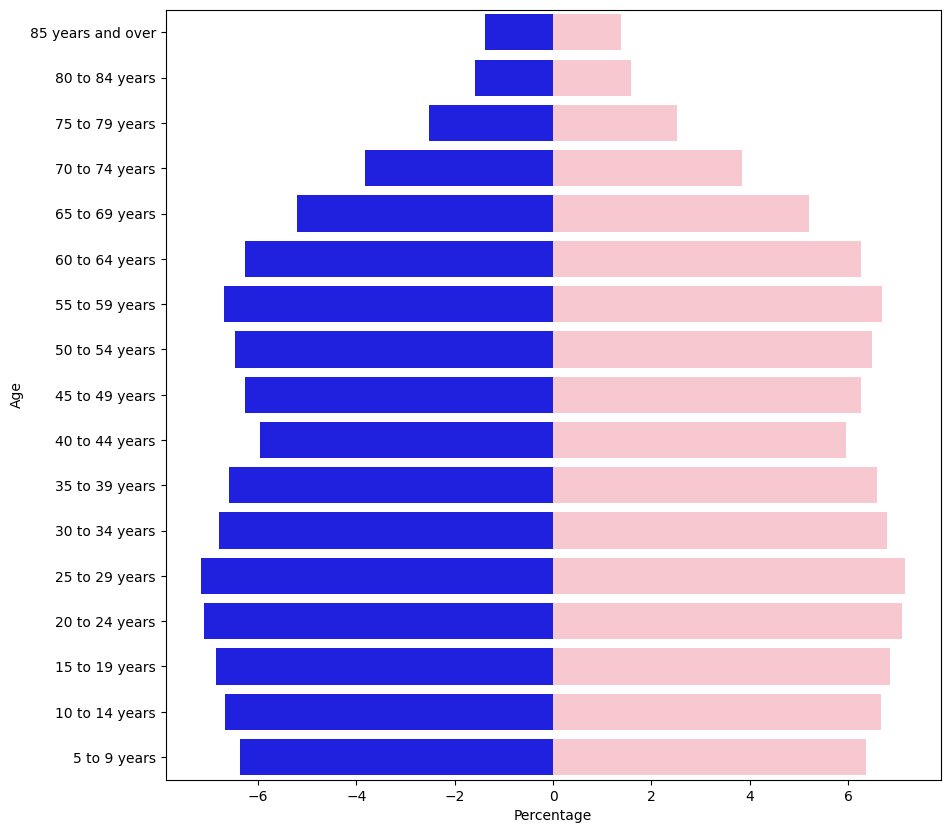

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,10))
sns.set_style("whitegrid")

bar_plot = sns.barplot(data=df_male, y='Age', x='Percentage', color='blue', lw=0,order=new_cols[::-1][:-2], ci=None)
bar_plot = sns.barplot(data=df_female, y='Age', x='Percentage', color='pink', lw=0,order=new_cols[::-1][:-2], ci=None)


# <font color = "red">Complete the missing part</font>

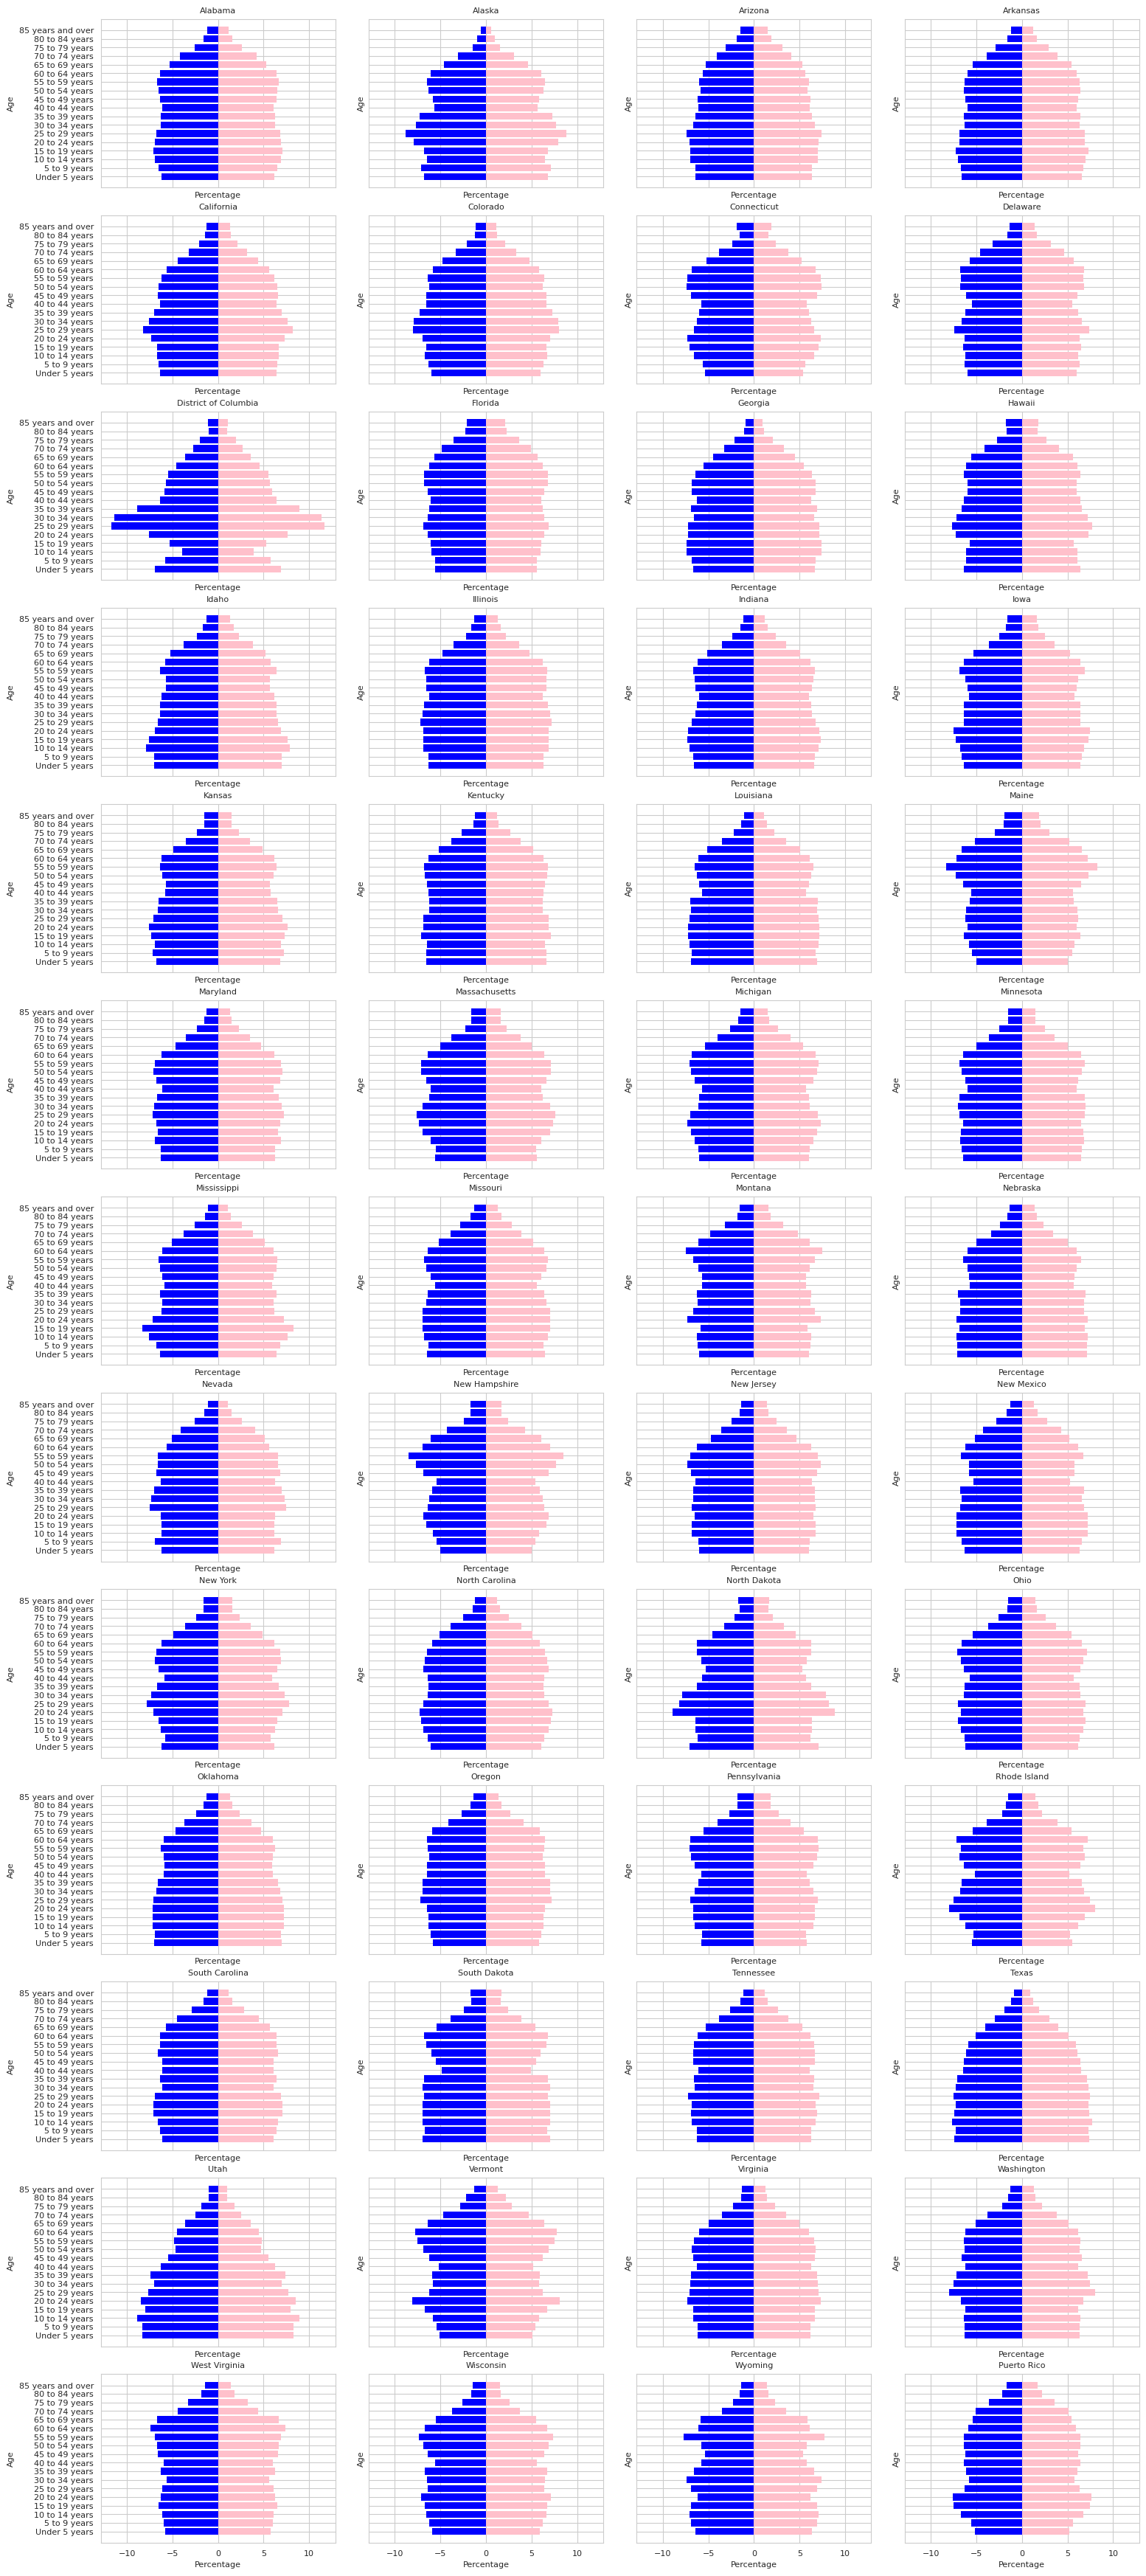

In [ ]:
states = df_female.state.unique()

f, ax = plt.subplots(13, 4, figsize=(15, 35), sharex=True, sharey=True)
f.tight_layout(pad=2)
params = {'axes.labelsize': 8,
          'axes.titlesize': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8}
plt.rcParams.update(params)
axs = ax.ravel()

for i, state in enumerate(states):
    axs[i].set_title(state)
    axs[i].set_xlabel('Percentage')
    axs[i].set_ylabel('Age')

    df_male_ = df_male[df_male['state'] == state]
    df_female_ = df_female[df_female['state'] == state]

    axs[i].barh(data=df_male_, y='Age', width='Percentage', color='blue', lw=0)
    axs[i].barh(data=df_female_, y='Age', width='Percentage', color='pink', lw=0)
